In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn imports
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from model import GradientDescentMultipleRegression 

from sklearn.metrics import mean_squared_error,r2_score

In [4]:
# Read the data
data = pd.read_csv('../data/Cellphone.csv')
data.head()

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,203,2357,10,135.0,5.2,424,8,1.35,16.0,3.000,13.00,8.0,2610,7.4
1,880,1749,10,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9
2,40,1916,10,110.0,4.7,312,4,1.20,8.0,1.500,13.00,5.0,2000,7.6
3,99,1315,11,118.5,4.0,233,2,1.30,4.0,0.512,3.15,0.0,1400,11.0
4,880,1749,11,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9


### Cleaning the data

In [5]:
# Check for missing values
data.isnull().sum()

Product_id      0
Price           0
Sale            0
weight          0
resoloution     0
ppi             0
cpu core        0
cpu freq        0
internal mem    0
ram             0
RearCam         0
Front_Cam       0
battery         0
thickness       0
dtype: int64

In [6]:
# Check for duplicated values
data[data.duplicated()]

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness


### Plot each feature against the target variable (Price)

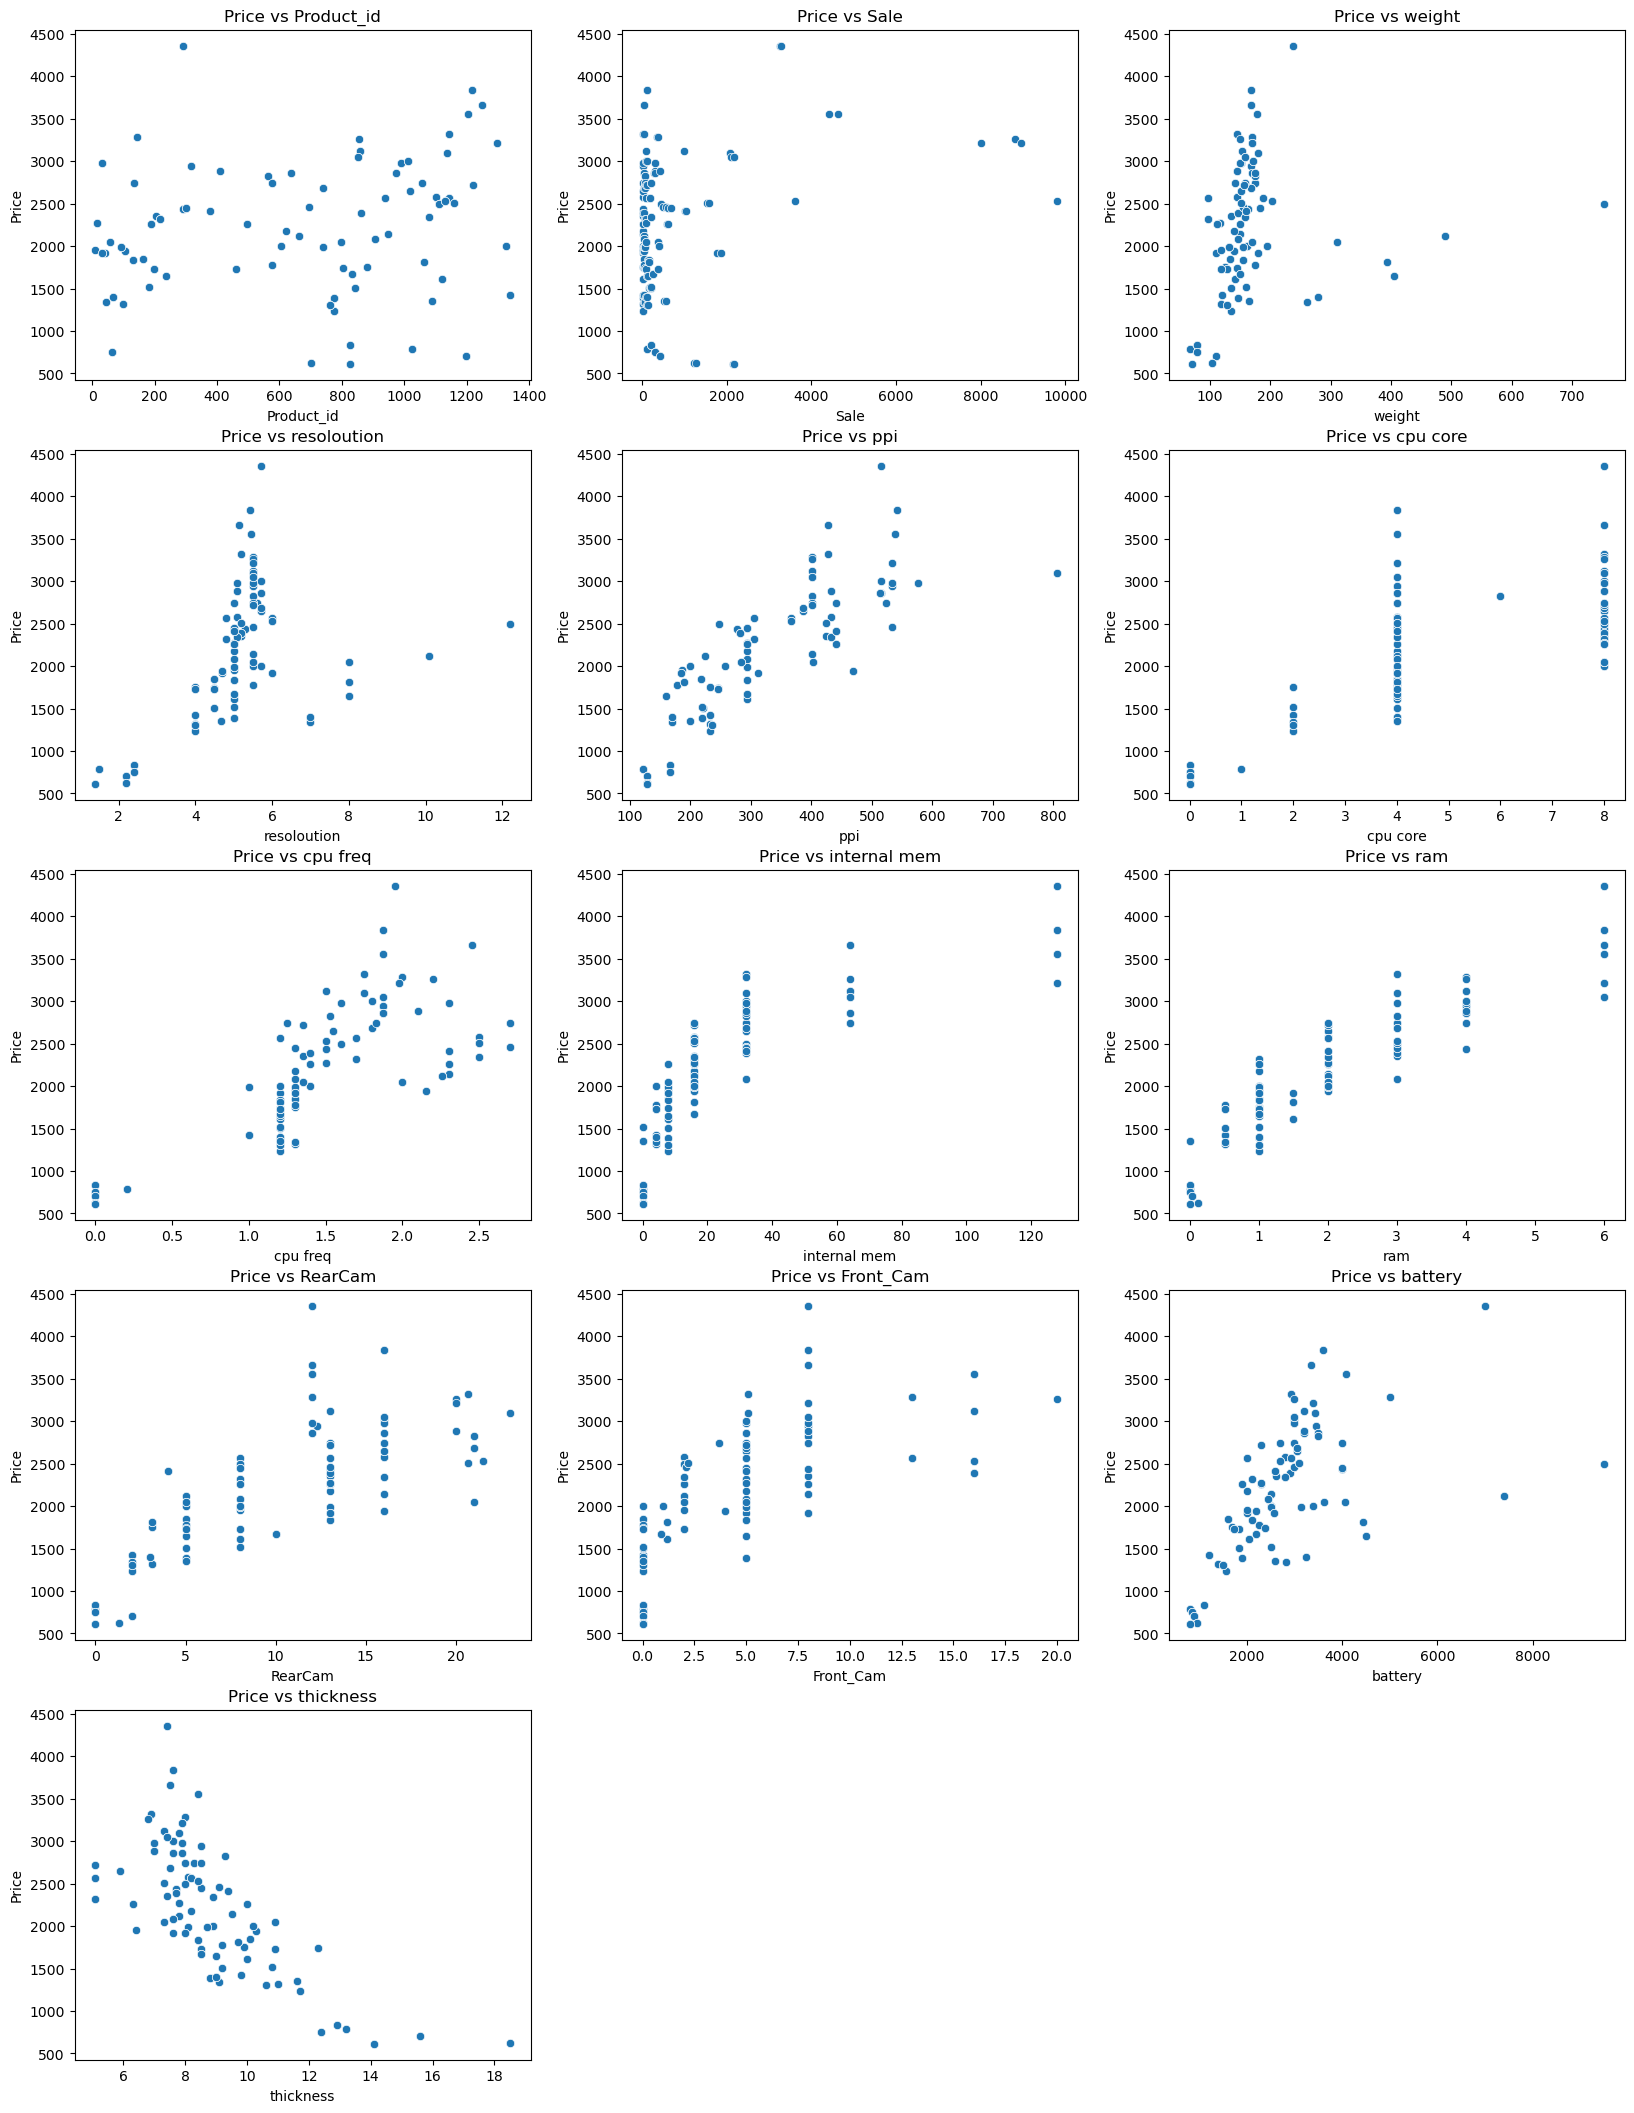

In [7]:


# Set the size and layout of the plot grid

features = data.drop("Price", axis = 1)
target = data["Price"]

plt.figure(figsize=(20, 70))

# Loop through each feature in the dataset
for i, feature in enumerate(features.columns, 1):
    plt.subplot(len(features.columns), 3, i)
    sns.scatterplot(x=data[feature], y=target)
    plt.xlabel(feature)
    plt.ylabel("Price")
    plt.title(f"Price vs {feature}")

plt.show()

# Check if my assumptions are correct

### Remove 'Product_id' column since it's not needed

In [8]:

data.drop('Product_id', inplace=True, axis=1)

# Seperating out the independent and dependent variables
X = data.drop("Price", axis = 1)
y = data["Price"]


### Train Test Split

In [9]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Then split training data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Using StandardScaler to standardize the features
scaler_X = StandardScaler()

# Transform training, validation, and test sets
X_train = scaler_X.fit_transform(X_train)
X_val = scaler_X.transform(X_val)
X_test = scaler_X.transform(X_test)


# Test default learning rate
print("Testing with default learning rate (0.05):")
model = GradientDescentMultipleRegression(learning_rate=0.05, n_iterations=1000)
model.fit(X_train, y_train)
default_predictions = model.predict(X_test)



# Evaluate default model
print("Default Model Performance:")
print(f"R² Score: {r2_score(y_test, default_predictions):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, default_predictions)):.4f}")

# Find the best learning rate using validation set
print("\nFinding best learning rate...")
model = GradientDescentMultipleRegression(n_iterations=1000)
best_lr, results = model.find_best_learning_rate(X_train, y_train, X_val, y_val)
print(f"Best learning rate found: {best_lr}")

# Train final model with best learning rate on combined training data
X_train_full = np.vstack([X_train, X_val])
y_train_full = np.concatenate([y_train, y_val])

print("\nTraining final model with best learning rate...")
model.learning_rate = best_lr
model.fit(X_train_full, y_train_full)

# Make predictions
predictions = model.predict(X_test)

# Evaluate optimized model
print("\nOptimized Model Performance:")
print(f"R² Score: {r2_score(y_test, predictions):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, predictions)):.4f}")

Testing with default learning rate (0.05):
Default Model Performance:
R² Score: 0.9392
RMSE: 139.6574

Finding best learning rate...
Learnings rates to test: [1e-07, 1e-06, 5e-05, 1e-05, 0.0005, 0.0001, 0.005, 0.001, 0.05, 0.01]
learning rate 1e-07
learning rate 1e-06
learning rate 5e-05
learning rate 1e-05
learning rate 0.0005
learning rate 0.0001
learning rate 0.005
learning rate 0.001
learning rate 0.05
learning rate 0.01
Best learning rate found: 0.01

Training final model with best learning rate...

Optimized Model Performance:
R² Score: 0.9459
RMSE: 131.6778


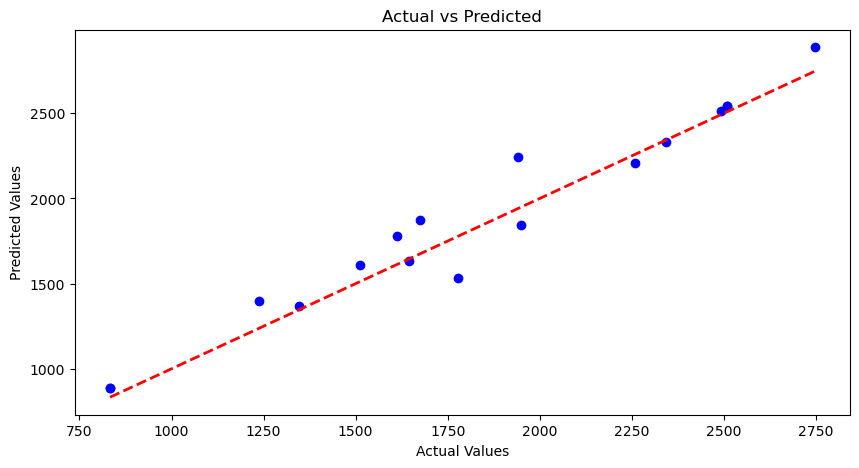

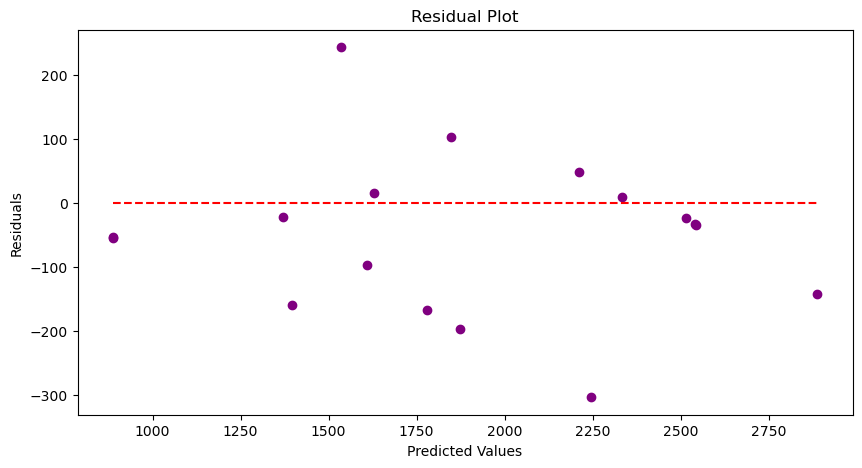

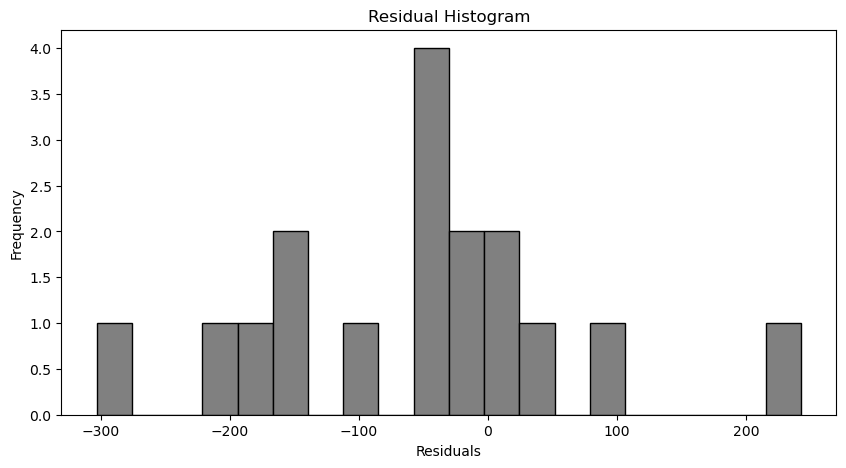

In [10]:
# Plotting Actual vs Predicted values
plt.figure(figsize=(10, 5))
plt.scatter(y_test, predictions, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted")
plt.show()

# Plotting Residuals
residuals = y_test - predictions
plt.figure(figsize=(10, 5))
plt.scatter(predictions, residuals, color='purple')
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max(), color='red', linestyles='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

# Histogram of Residuals
plt.figure(figsize=(10, 5))
plt.hist(residuals, bins=20, color='gray', edgecolor='black')
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residual Histogram")
plt.show()